In [13]:
!git clone https://github.com/matterport/Mask_RCNN

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 956, done.
remote: Total 956 (delta 0), reused 0 (delta 0), pack-reused 956
Receiving objects: 100% (956/956), 111.82 MiB | 31.66 MiB/s, done.
Resolving deltas: 100% (568/568), done.


In [14]:
#RUN GPU
%tensorflow_version 1.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [0]:
import os
os.chdir('Mask_RCNN')

In [16]:
!ls

assets	LICENSE      mrcnn	requirements.txt  setup.cfg
images	MANIFEST.in  README.md	samples		  setup.py


In [17]:
!python3 setup.py install;

running install
running bdist_egg
running egg_info
creating mask_rcnn.egg-info
writing mask_rcnn.egg-info/PKG-INFO
writing dependency_links to mask_rcnn.egg-info/dependency_links.txt
writing top-level names to mask_rcnn.egg-info/top_level.txt
writing manifest file 'mask_rcnn.egg-info/SOURCES.txt'
reading manifest template 'MANIFEST.in'
writing manifest file 'mask_rcnn.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/mrcnn
copying mrcnn/model.py -> build/lib/mrcnn
copying mrcnn/visualize.py -> build/lib/mrcnn
copying mrcnn/parallel_model.py -> build/lib/mrcnn
copying mrcnn/__init__.py -> build/lib/mrcnn
copying mrcnn/utils.py -> build/lib/mrcnn
copying mrcnn/config.py -> build/lib/mrcnn
creating build/bdist.linux-x86_64
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/model.py -> build/bdist.linux-x86_64/egg/mrcnn

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Mask RCNN Prediciton - Tree

You can use this notebook to detect tree in your own images.
- Press 'shift+Enter' to run cells. 
- Run the first two cells to setup the model.
- Enter your file path in cell 3. 
- Make your predictions in cell 4.

In [0]:
import mrcnn
import mrcnn.model as modellib
from mrcnn.config import Config
from mrcnn import visualize
from mrcnn import utils
from mrcnn.model import MaskRCNN, load_image_gt, mold_image, log

import numpy as np
import colorsys
import argparse
import random
import os
import sys
import time
import json
import skimage
import datetime
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array
import pickle
import warnings
warnings.simplefilter('ignore')
%matplotlib inline

In [0]:
modeldir='/content/drive/My Drive/Colab Notebooks'
datadir=modeldir+'/RCNN_test/'

class PredictionConfig(Config):
    NAME = "MaskRCNN_cfg"
    NUM_CLASSES = 1 + 1
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    

cfg = PredictionConfig()
model = MaskRCNN(mode='inference', model_dir='./', config=cfg)
weights_fname =modeldir+'saved/weights_tree_20200424T1244.h5'
model.load_weights(weights_fname, by_name=True)

def prediction(file, model, confidence=0.95, color='red'):
    image = skimage.io.imread(file)
    results = model.detect([image], verbose=1)[0]

    fig=plt.figure(figsize=(12,10))
    plt.plot()

    plt.imshow(image)
    plt.title('Predicted')
    ax = plt.gca()
    # Define the boxes with probabilies to keep
    keep=np.where(results['scores'] > confidence)
    keep=keep[0]
    
    for box in keep:
        y1, x1, y2, x2 = results['rois'][box]
        width, height = x2 - x1, y2 - y1
        rect = Rectangle((x1, y1), width, height, fill=False, color=color)
        ax.add_patch(rect)
        ax.text(x1, y1, 'tree', fontsize=10, color=color)
        ax.axis('off')
    plt.show()

    return results

## Insert the path to your file:

In [0]:
file=datadir+'/predict/sample3.jpg'

## Make a prediciton
- Change how sensitive the detection is by setting the confidence. This is the probability that the object detected is a tree (between 0.00 and 1.00)
- Change the colour of the text and bounding boxes depending on your photo

Processing 1 images
image                    shape: (2825, 1018, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 2825.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


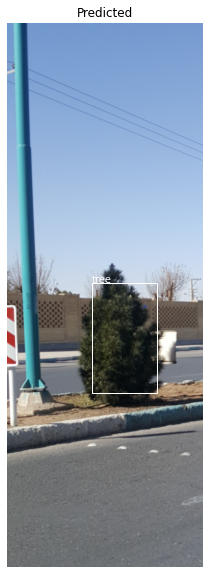

In [30]:
r=prediction(file, model, confidence=0.95, color='white');